### -------------------------------FinTech Dataset - Churn Prediction Project---------------------------

### As 1st step, libraries are imported to work on the entire project

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering and Feature Selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# ML Libraries for building classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb

# Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importing the dataset getting familirizied

In [2]:
df = pd.read_csv('Fintech_user.csv')
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
df.tail()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
26995,24291,1,24.0,R,580.0,0,0,0,0,0,81,0,0,2,1,1,1,0,1,2,Weekly,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,1,26.0,na,NaN,0,0,2,0,0,1,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,0,22.0,na,NaN,0,0,37,0,0,98,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,1,46.0,na,529.0,2,0,16,2,0,58,0,0,2,1,1,1,1,0,0,Semi-Monthly,0,0,0,0,Aries,1,0,27.0,0.90,1
26999,52752,1,34.0,na,525.0,0,0,4,0,0,11,0,0,0,1,0,0,1,1,2,na,0,0,0,0,Cancer,0,0,4.0,0.13,0


### Data Understanding Process

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [5]:
df['payment_type'].value_counts()

Bi-Weekly       12716
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2440
Name: payment_type, dtype: int64

In [6]:
df.shape

(27000, 31)

In [7]:
df.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
df['churn'].value_counts()

0    15826
1    11174
Name: churn, dtype: int64

### Checking null values

<Axes: >

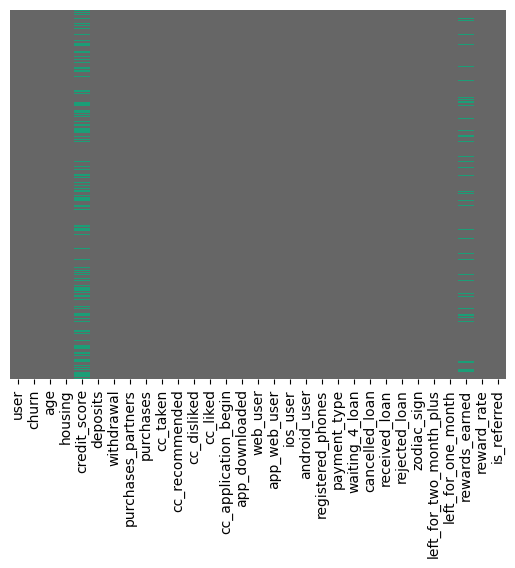

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Dark2_r')

### Data Cleaning / Filling NA values

In [10]:
# Calculate the mean of 'credit score' and 'rewards earned' and round them
credit_score_mean = round(df['credit_score'].mean(), 1)
rewards_earned_mean = round(df['rewards_earned'].mean(), 1)
age_mean = round(df['age'].mean(), 1)

# Fill null values with the rounded means
df['credit_score'].fillna(credit_score_mean, inplace=True)
df['rewards_earned'].fillna(rewards_earned_mean, inplace=True)
df['age'].fillna(age_mean, inplace=True)

<Axes: >

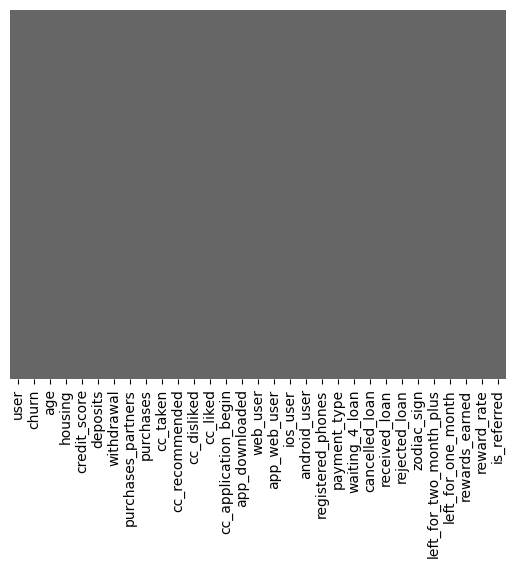

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Dark2_r')

In [12]:
df.isnull().sum().sum()

0

### After data cleaning, moving to next process -> Data visualization

In [13]:
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,542.9,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,29.1,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,542.9,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [14]:
# Replace "na" with "N" in the "housing" column
df['housing'] = df['housing'].replace('na', 'N')

In [15]:
# change na to N
df['housing'].value_counts()

N    13860
R    10969
O     2171
Name: housing, dtype: int64

In [16]:
df.drop(['user', 'zodiac_sign'], axis=1, inplace=True)
df.head()

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,0,37.0,N,542.9,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,1,0,29.1,0.00,0
1,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,0,0,44.0,1.47,1
2,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,1,0,65.0,2.17,0
3,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,0,0,33.0,1.10,1
4,1,27.0,N,542.9,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,1,0,1.0,0.03,0


In [17]:
df['rewards_earned'].max()

114.0

In [18]:
df.describe()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,0.413852,32.219919,542.931070,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.108915,0.907684,0.318037
std,0.492532,9.964100,51.178658,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,20.618536,0.752016,0.465723
min,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,25.000000,522.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.200000,0.000000
50%,0.000000,30.000000,542.900000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.100000,0.780000,0.000000
75%,1.000000,37.000000,562.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.530000,1.000000
max,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Showing multiple visuals in one frame for clear view

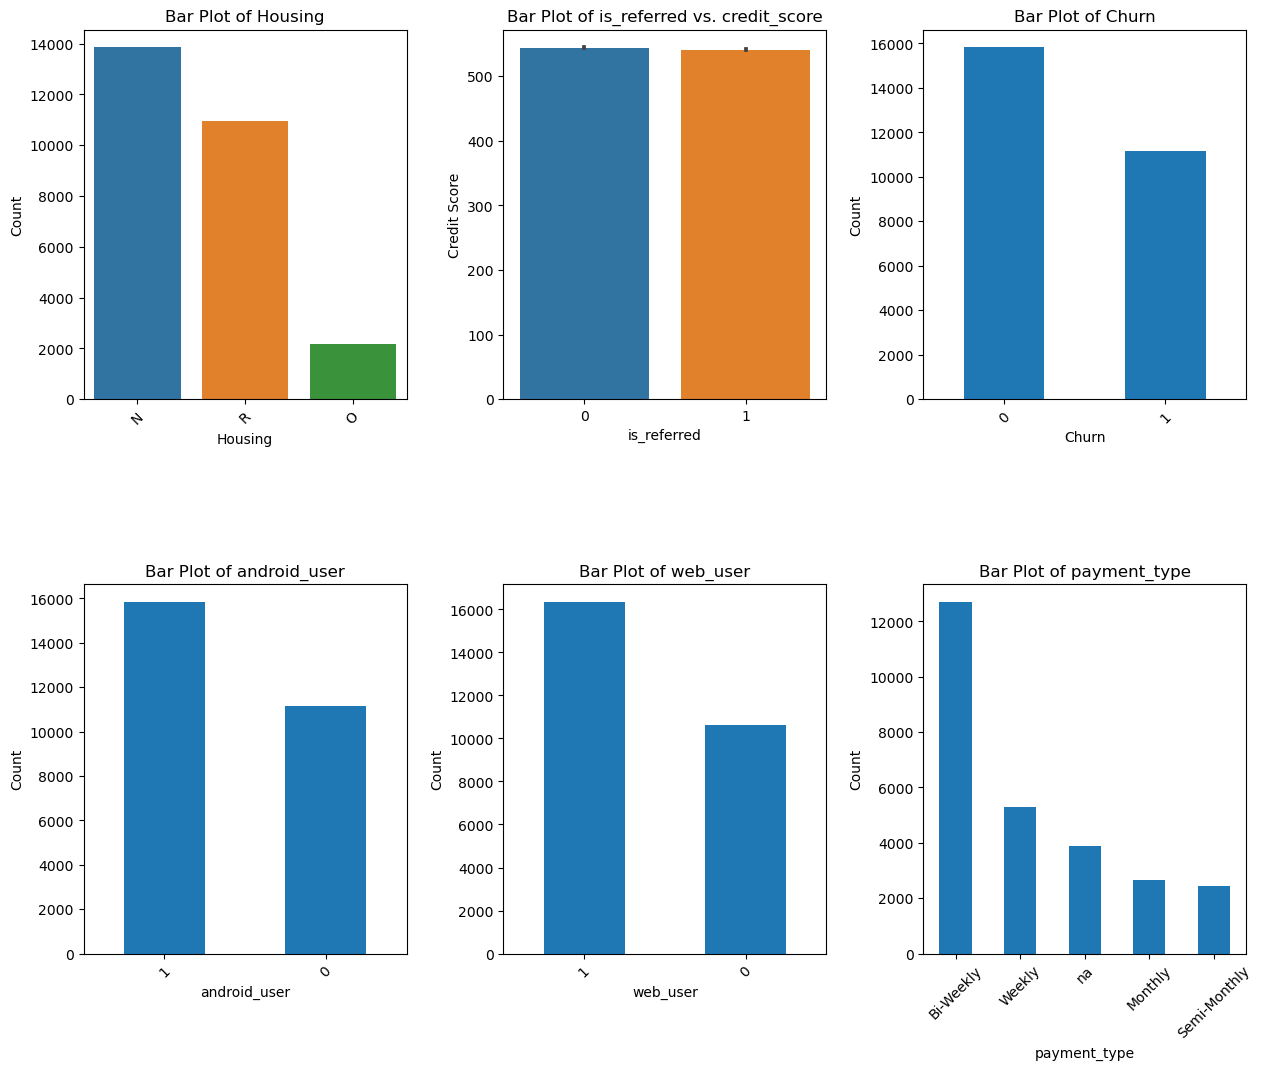

In [19]:
# Set the figure size and layout
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot 1: Bar Plot of Housing
plt.subplot(2, 3, 1)
housing_counts = df['housing'].value_counts()
sns.barplot(x=housing_counts.index, y=housing_counts.values)
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Bar Plot of Housing')
plt.xticks(rotation=45)

# Plot 2: Bar Plot of is_referred vs. credit_score
plt.subplot(2, 3, 2)
sns.barplot(data=df, x="is_referred", y="credit_score")
plt.xlabel('is_referred')
plt.ylabel('Credit Score')
plt.title('Bar Plot of is_referred vs. credit_score')

# Plot 3: Bar Plot of Churn
plt.subplot(2, 3, 3)
df['churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Bar Plot of Churn')
plt.xticks(rotation=45)

# Plot 4: Bar Plot of android_user
plt.subplot(2, 3, 4)
df['android_user'].value_counts().plot(kind='bar')
plt.xlabel('android_user')
plt.ylabel('Count')
plt.title('Bar Plot of android_user')
plt.xticks(rotation=45)

# Plot 5: Bar Plot of web_user
plt.subplot(2, 3, 5)
df['web_user'].value_counts().plot(kind='bar')
plt.xlabel('web_user')
plt.ylabel('Count')
plt.title('Bar Plot of web_user')
plt.xticks(rotation=45)

# Plot 6: Bar Plot of payment_type
plt.subplot(2, 3, 6)
df['payment_type'].value_counts().plot(kind='bar')
plt.xlabel('payment_type')
plt.ylabel('Count')
plt.title('Bar Plot of payment_type')
plt.xticks(rotation=45)

# Display all the bar plots
plt.show()

### Viewing the Churn column in Pie Chart to understand it better

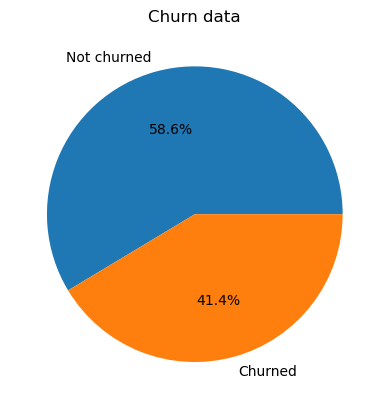

In [20]:
# count the occurrences of each value in the `churn` column
counts = df['churn'].value_counts()

# create a pie chart
plt.pie(counts, labels=['Not churned', 'Churned'], autopct='%1.1f%%')

# add a title
plt.title('Churn data')

# display the chart
plt.show()

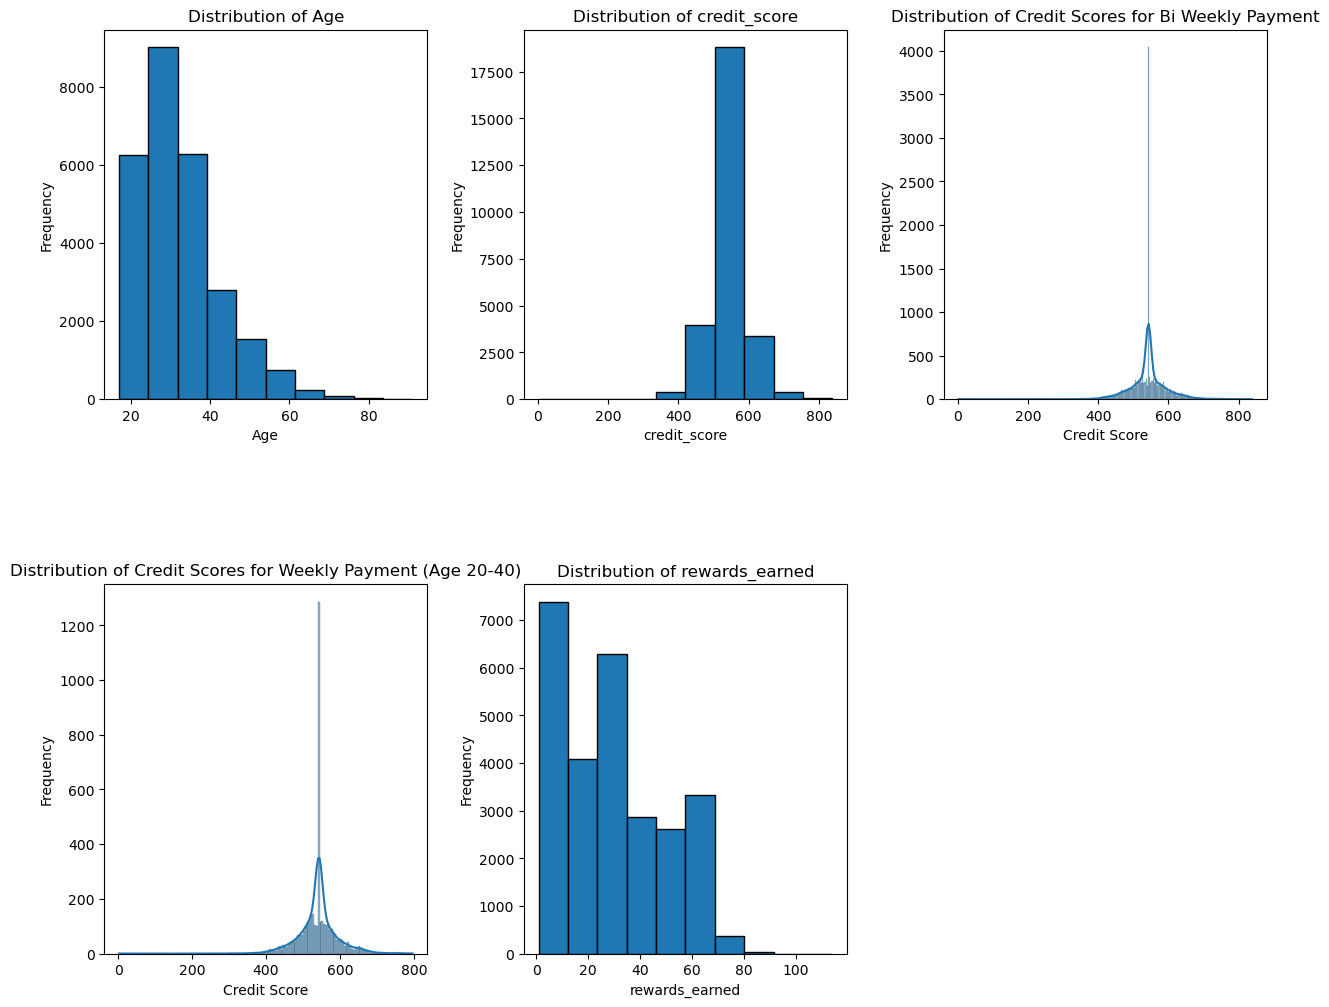

In [21]:
# Set the figure size and layout
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot 1: Distribution of Age
plt.subplot(2, 3, 1)
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Plot 2: Distribution of credit_score
plt.subplot(2, 3, 2)
plt.hist(df['credit_score'], bins=10, edgecolor='black')
plt.xlabel('credit_score')
plt.ylabel('Frequency')
plt.title('Distribution of credit_score')

# Plot 3: Distribution of Credit Scores for Bi Weekly Payment
plt.subplot(2, 3, 3)
biweekly_df = df[df['payment_type'] == 'Bi-Weekly']
sns.histplot(biweekly_df['credit_score'], kde=True)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores for Bi Weekly Payment')

# Plot 4: Distribution of Credit Scores for Weekly Payment (Age 20-40)
plt.subplot(2, 3, 4)
filtered_df = df[(df['payment_type'] == 'Weekly') & (df['age'].between(20, 40))]
sns.histplot(filtered_df['credit_score'], kde=True)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores for Weekly Payment (Age 20-40)')

# Plot 5: Distribution of rewards_earned
plt.subplot(2, 3, 5)
plt.hist(df['rewards_earned'], bins=10, edgecolor='black')
plt.xlabel('rewards_earned')
plt.ylabel('Frequency')
plt.title('Distribution of rewards_earned')

# Display all the histograms
plt.show()

In [22]:
df['age'].min()

17.0

In [23]:
df['age'].max()

91.0

### Outlier detection

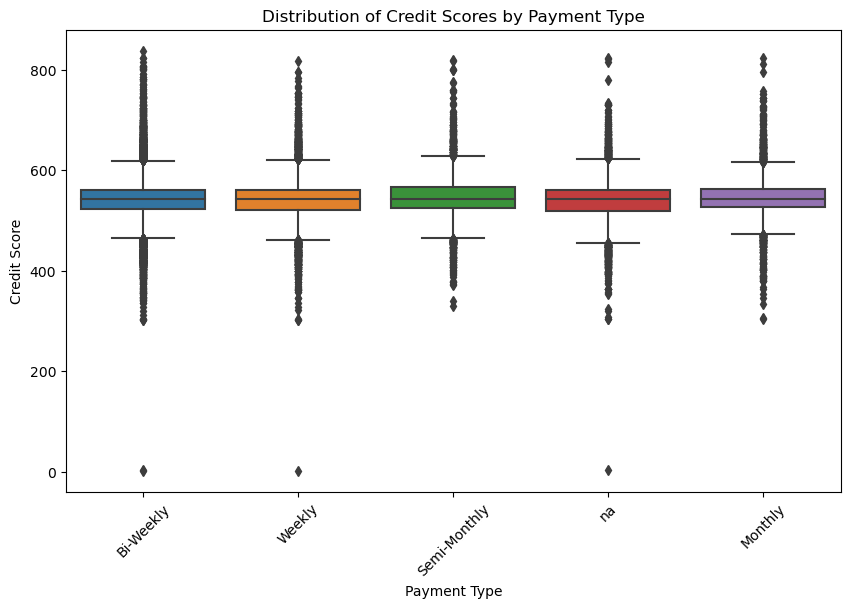

In [24]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize credit scores for each payment type
sns.boxplot(x='payment_type', y='credit_score', data=df)

# Set the labels and title for the plot
plt.xlabel('Payment Type')
plt.ylabel('Credit Score')
plt.title('Distribution of Credit Scores by Payment Type')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

<Axes: >

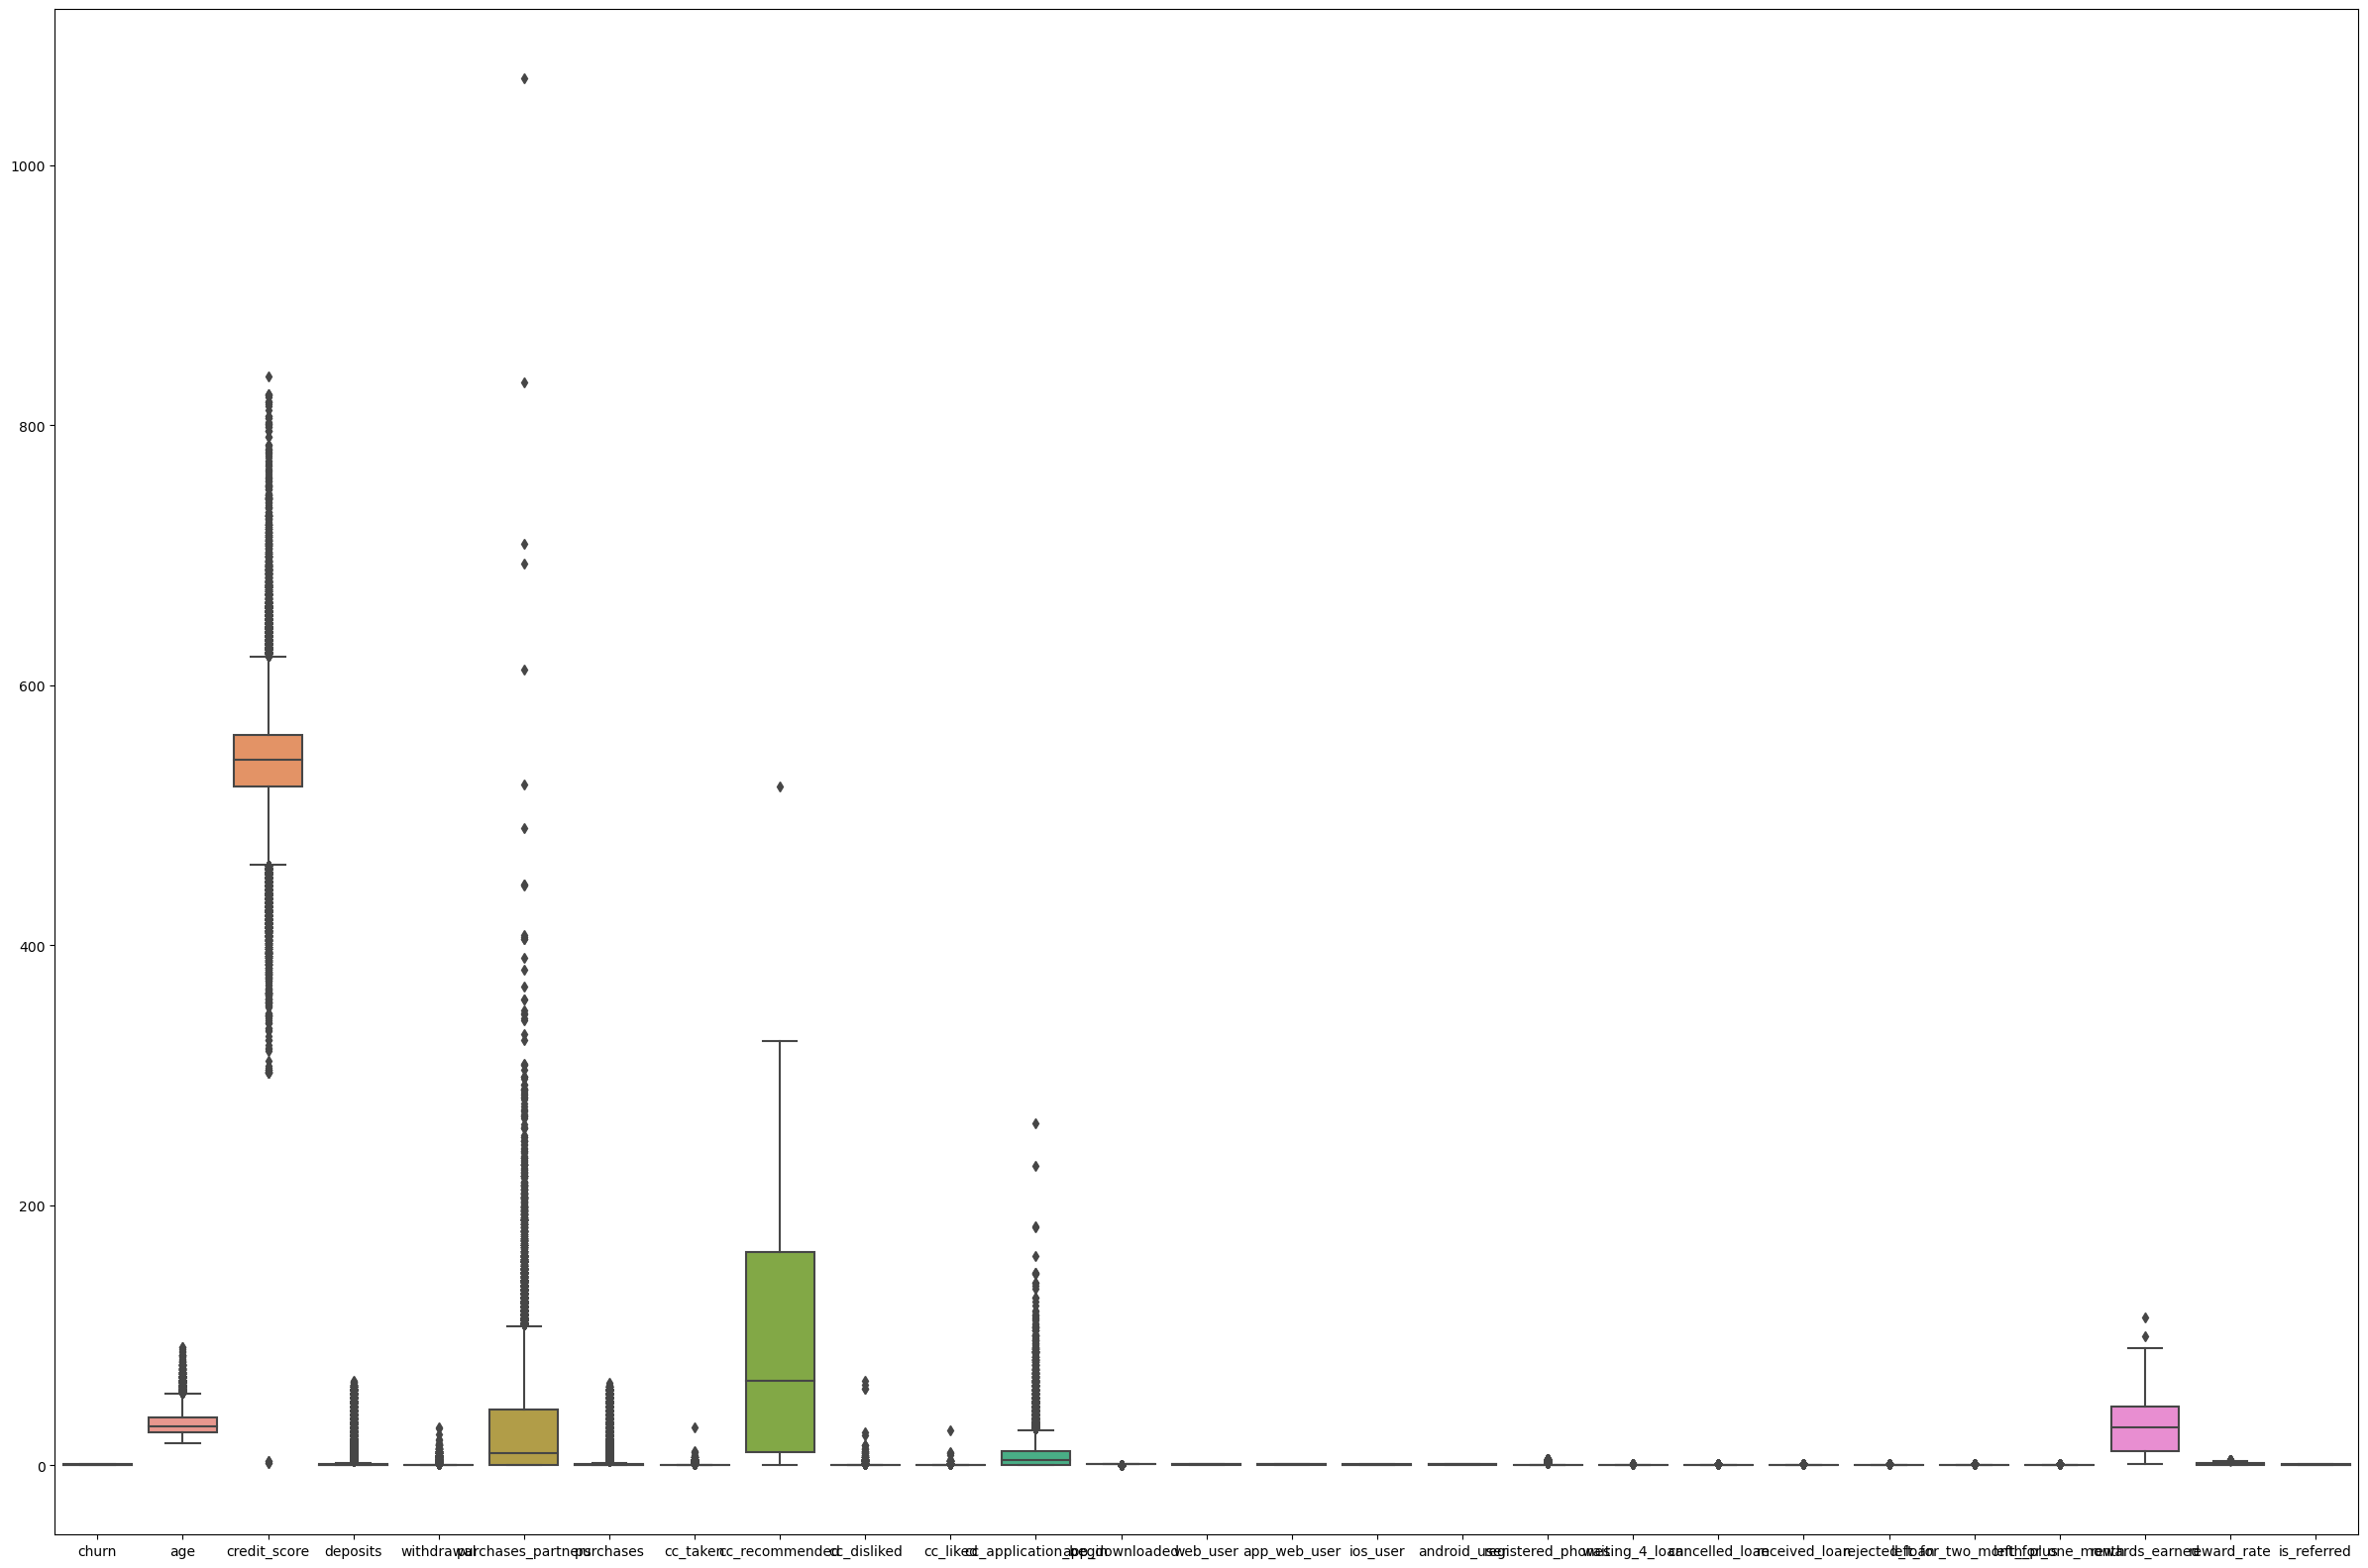

In [25]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df)

<Axes: xlabel='cc_recommended'>

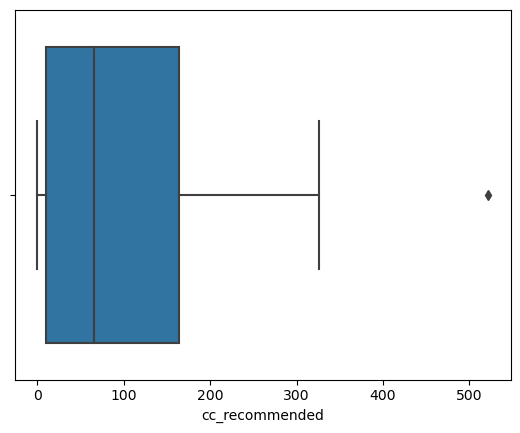

In [26]:
sns.boxplot(x=df["cc_recommended"])

### Outlier treatment for whole columns which have outliers

In [27]:
# Define the outlier treatment function
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Define the columns and their respective outlier treatment cases
columns = [
    {'name': 'age', 'case': 1},
    {'name': 'credit_score', 'case': 2},
    {'name': 'deposits', 'case': 3},
    {'name': 'withdrawal', 'case': 4},
    {'name': 'purchases_partners', 'case': 5},
    {'name': 'purchases', 'case': 6},
    {'name': 'cc_taken', 'case': 7},
    {'name': 'cc_disliked', 'case': 8},
    {'name': 'cc_liked', 'case': 9},
    {'name': 'cc_application_begin', 'case': 10},
    {'name': 'rewards_earned', 'case': 11}
]

# Perform outlier treatment using a for loop
for col in columns:
    lowerbound, upperbound = outlier_treatment(df[col['name']])
    df[col['name']] = np.clip(df[col['name']], a_min=lowerbound, a_max=upperbound)


<Axes: >

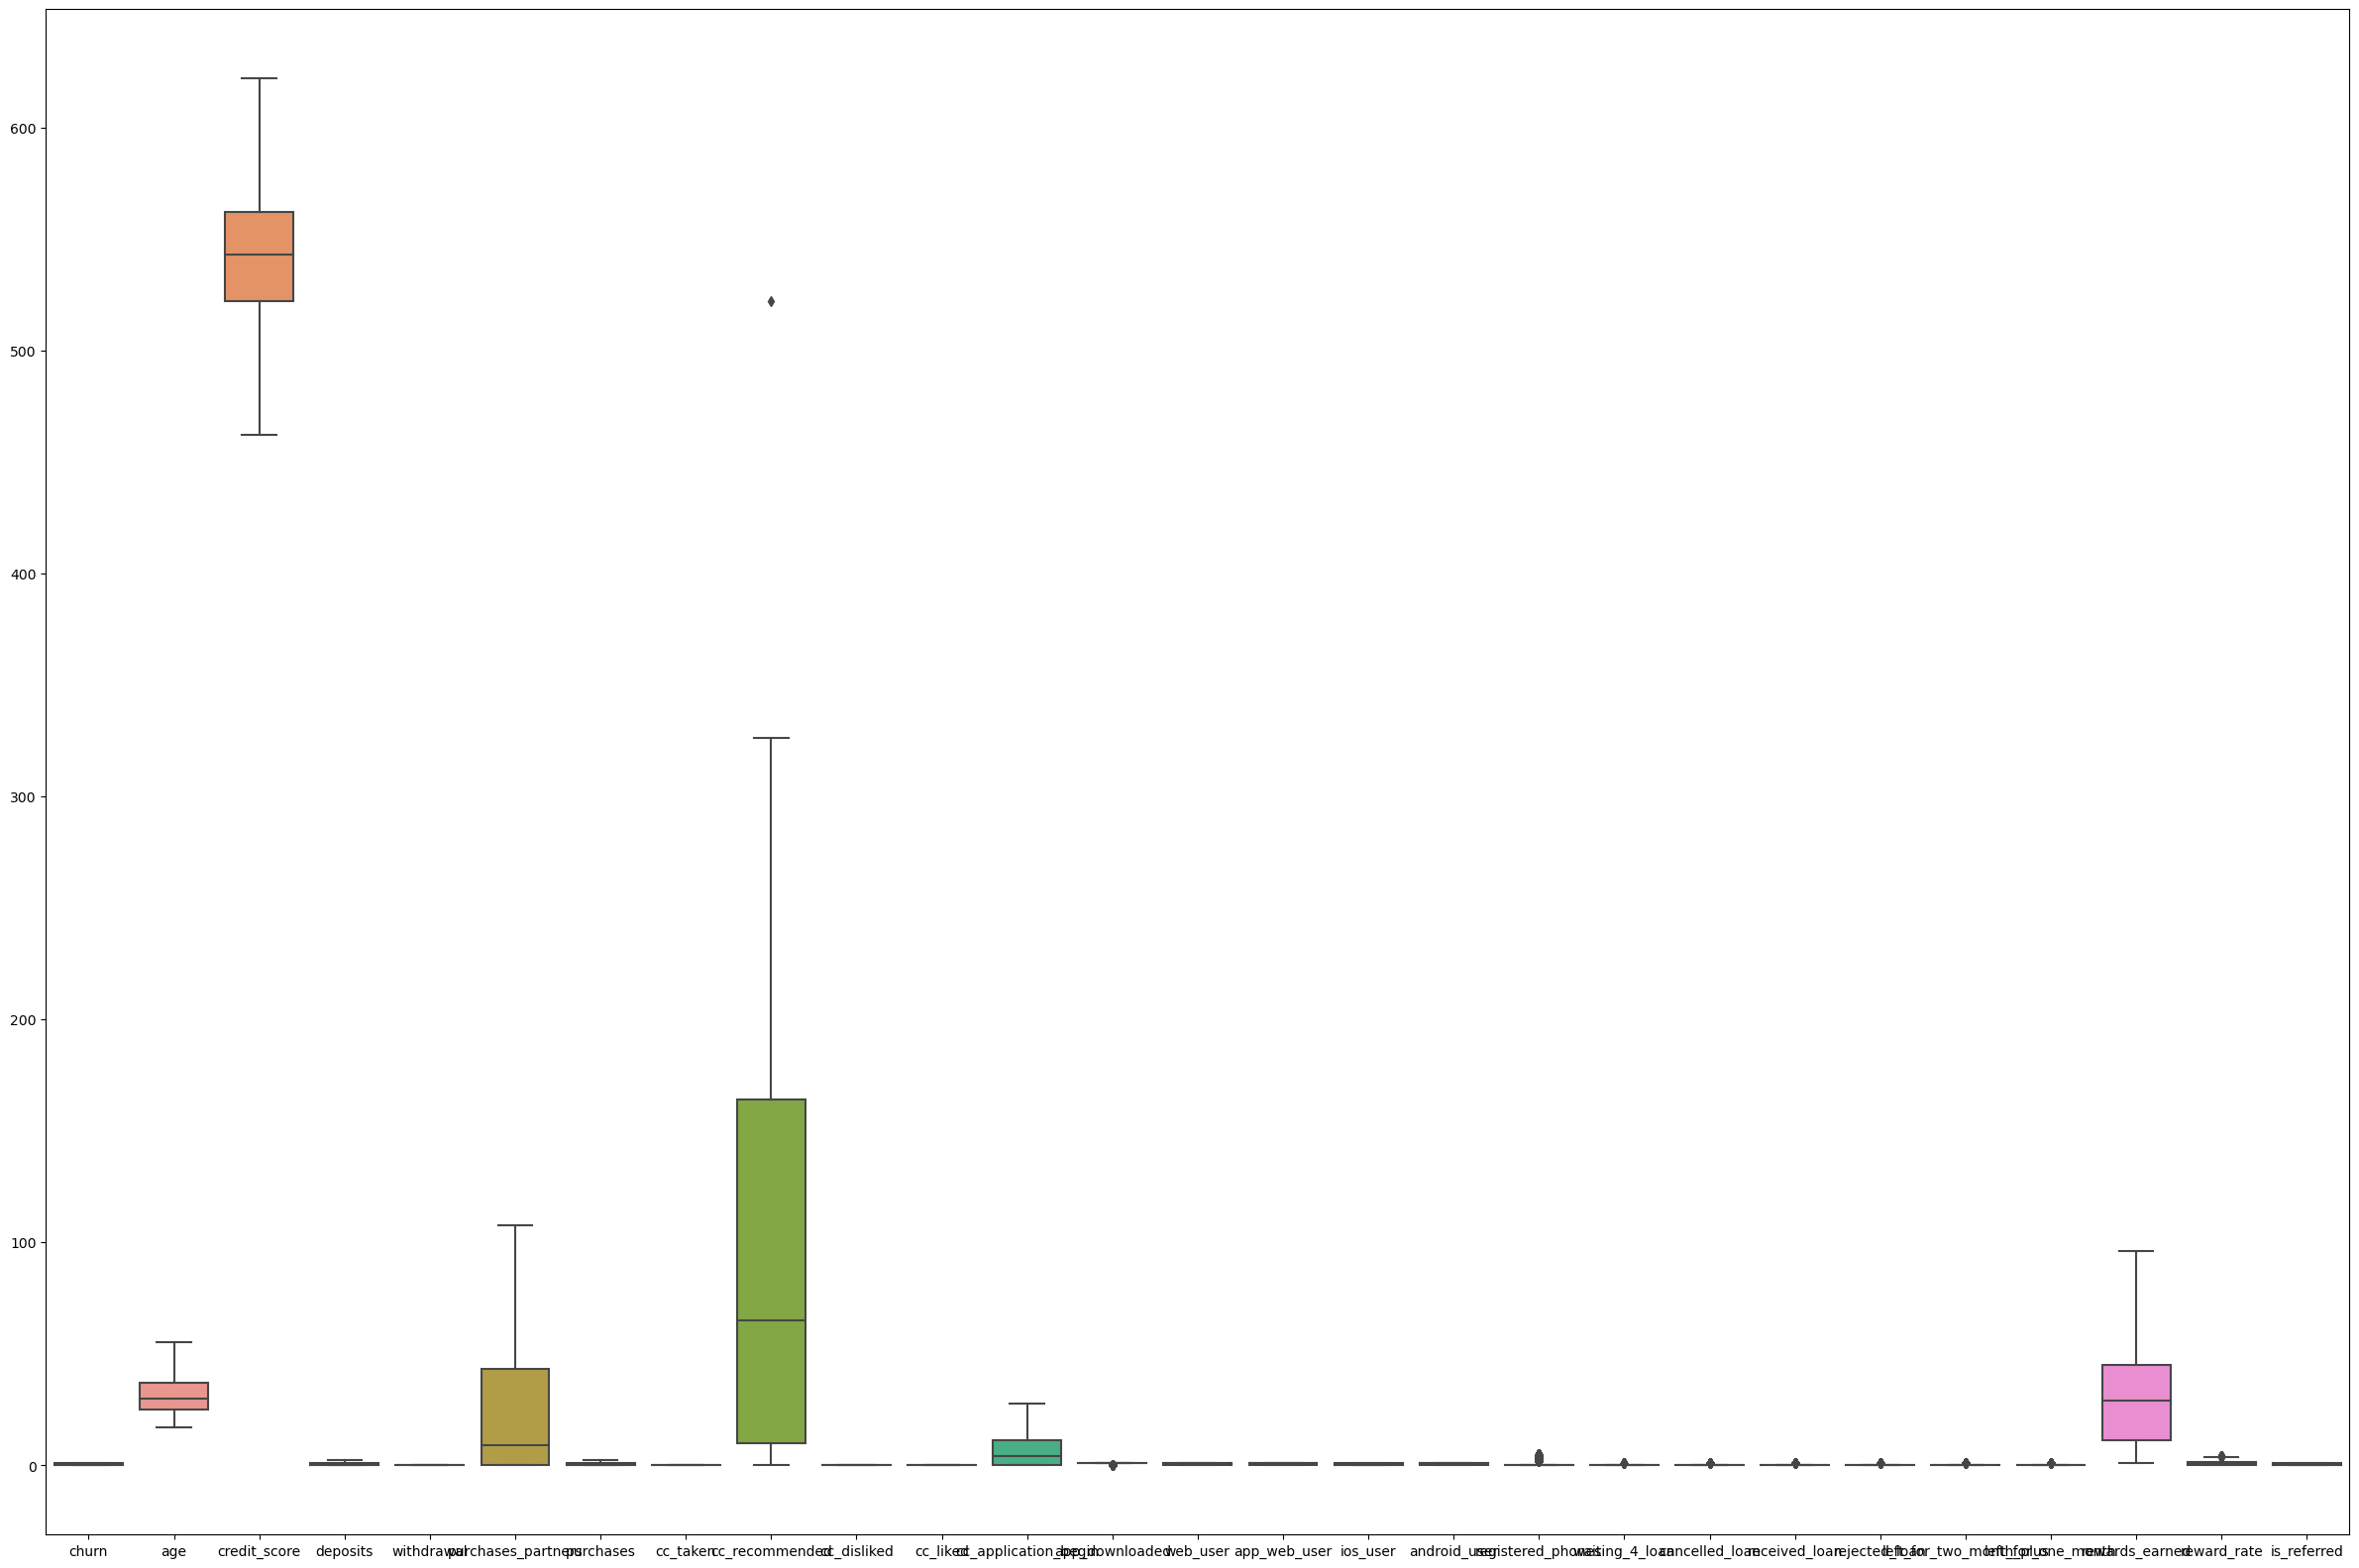

In [28]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df)

<Axes: >

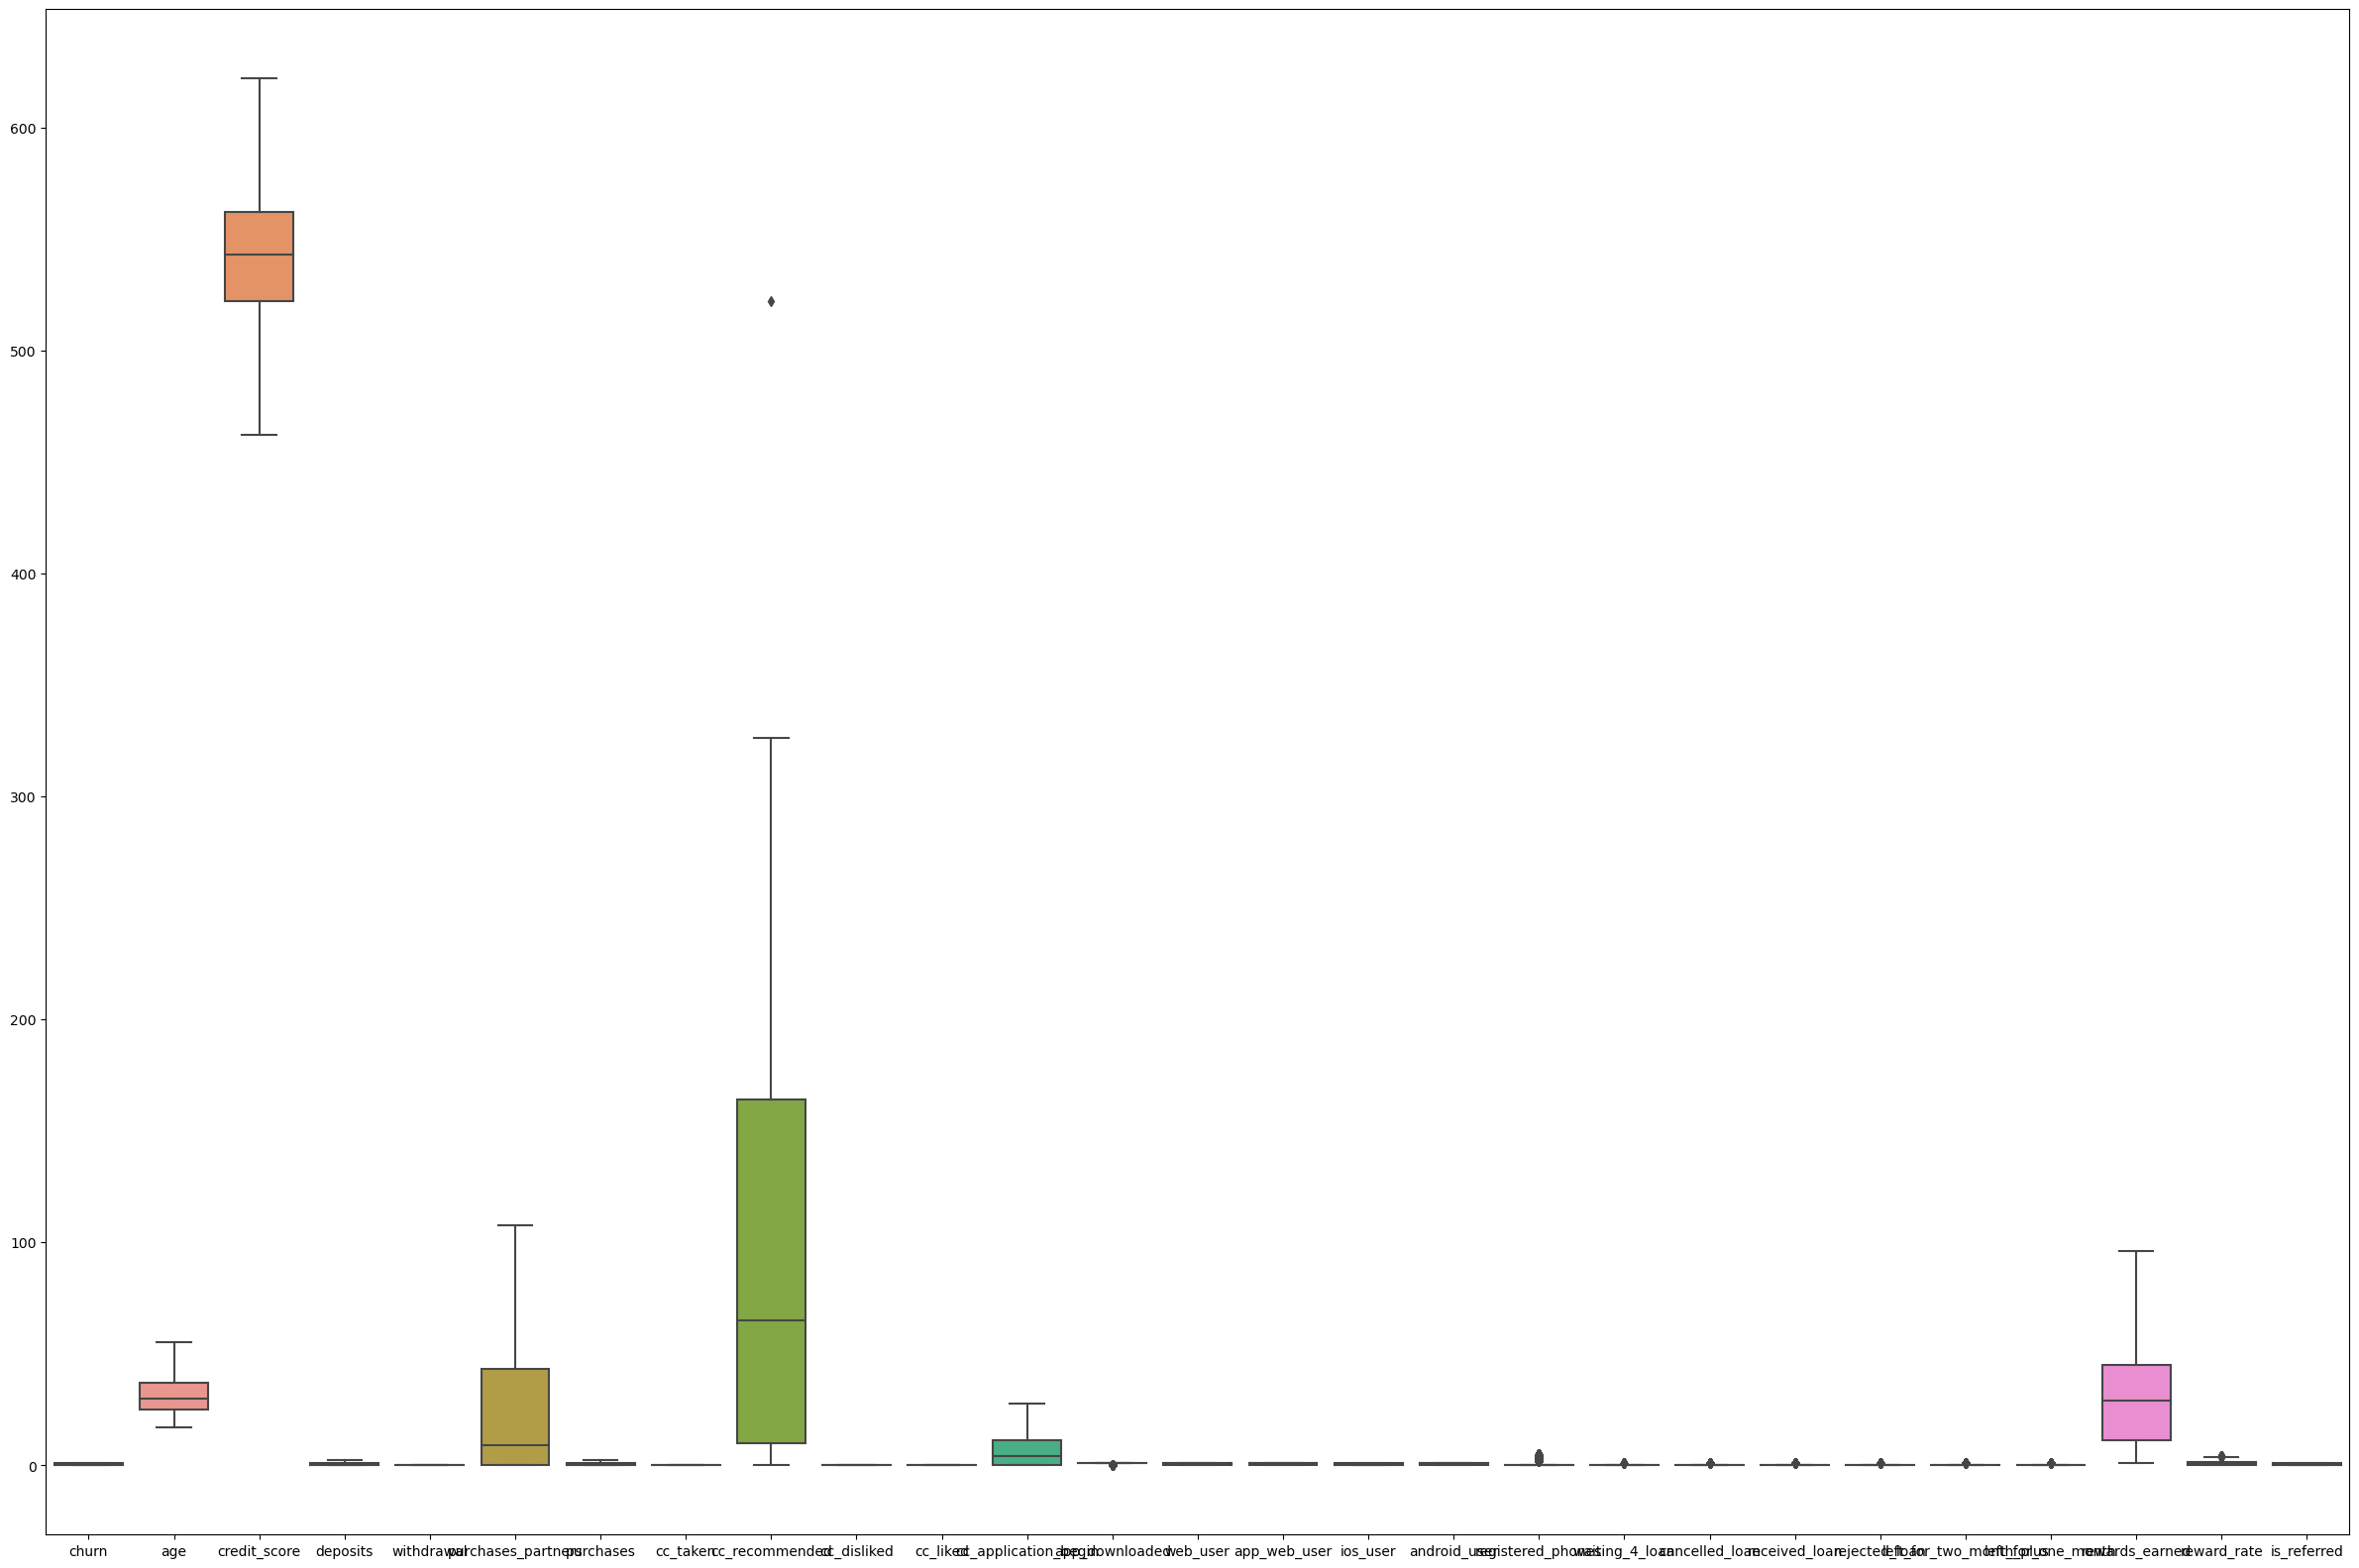

In [29]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df)

### Feature Selection and Feature Engineering

In [30]:
print(np.__version__)

1.25.0


In [31]:
import numpy as np

Text(0.5, 1.0, 'Correlation Heatmap')

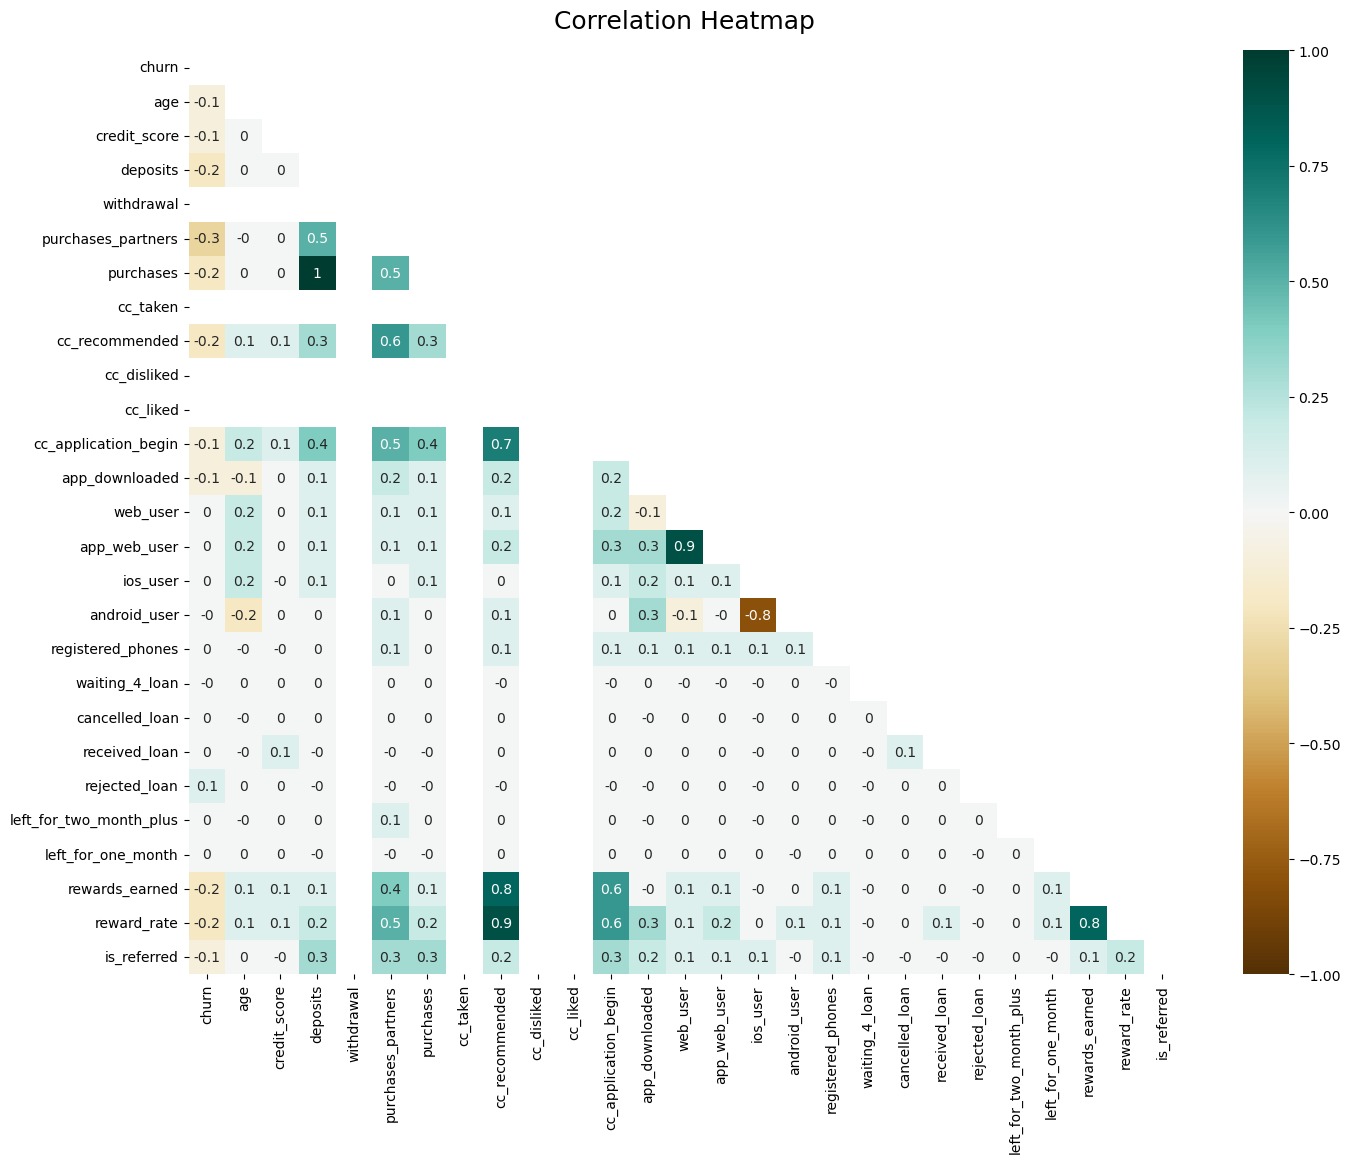

In [32]:
plt.figure(figsize=(16, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))  # Updated attribute: dtype=bool
heatmap = sns.heatmap(round(df.corr(), 1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [33]:
df.head()

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,0,37.0,N,542.9,0.0,0,0.0,0.0,0,0,0,0,0.0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,1,0,29.1,0.00,0
1,0,28.0,R,486.0,0.0,0,1.0,0.0,0,96,0,0,5.0,1,1,1,1,0,0,Weekly,0,0,0,0,0,0,44.0,1.47,1
2,0,35.0,R,561.0,2.5,0,86.0,2.5,0,285,0,0,9.0,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,1,0,65.0,2.17,0
3,0,26.0,R,567.0,2.5,0,38.0,2.5,0,74,0,0,26.0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,0,0,33.0,1.10,1
4,1,27.0,N,542.9,0.0,0,2.0,0.0,0,0,0,0,0.0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,1,0,1.0,0.03,0


In [34]:
# Initialize LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Label encode the first column 'payment_type'
df['payment_type'] = label_encoder.fit_transform(df['payment_type'])

# Label encode the second column 'housing'
df['housing'] = label_encoder.fit_transform(df['housing'])

### Implementation of Machine Learning Algorithms. First starting with Random Forest. Reason is, target column 'churn' is imbalanced. So, Random Forest would be better choice.

### Random Forest Implementation

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('churn',axis=1), df['churn'], test_size=0.20, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
rf.fit(X_train,y_train);

In [37]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

In [38]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [39]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.72      0.84      0.78      3166
           1       0.70      0.54      0.61      2234

    accuracy                           0.71      5400
   macro avg       0.71      0.69      0.69      5400
weighted avg       0.71      0.71      0.71      5400



### General results of Random Forest implementation are shown above. Accuracy is good for class 0, but not good for class 1. So, additional add ons must be needed.

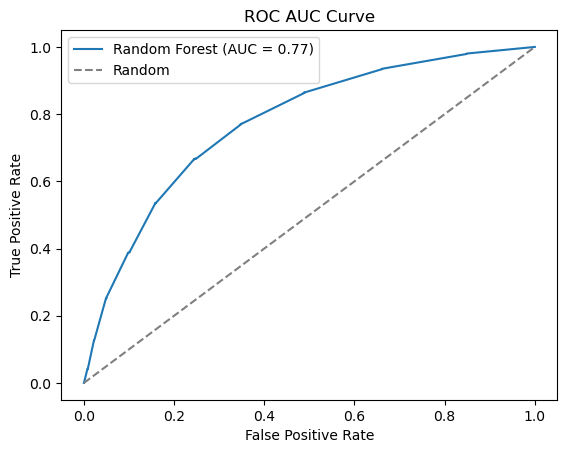

In [40]:
# Generate predicted probabilities
y_prob = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the individual models to include in the ensemble
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = SVC()

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('svc', model3)], voting='hard') 
# Adjust the estimators and voting parameter as needed

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ensemble.predict(X_test)

# Calculate accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Voting Ensemble):", accuracy)

Accuracy (Voting Ensemble): 0.6918518518518518


In [42]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [43]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

In [44]:
model = xgb.train(params, dtrain)
y_pred = model.predict(dtest)
y_pred_binary = [1 if val > 0.5 else 0 for val in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

[16:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 0.6809259259259259


### Trying Hyperparameter tuning for better results

In [45]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best parameters on the testing set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.7323148148148149
Accuracy: 0.7338888888888889


### Next, BalancedRandomForestClassifier is implemented because, we need to set the balance in order to get better results.

In [46]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Train a Balanced Random Forest classifier
brf_model = BalancedRandomForestClassifier(random_state=42)
brf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = brf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7324074074074074
Precision: 0.6638969671790611
Recall: 0.7153088630259624
F1 Score: 0.6886446886446886


In [47]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
# Apply random under-sampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the balanced training data
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7211111111111111
Precision: 0.6510373443983403
Recall: 0.7023276633840645
F1 Score: 0.6757105943152455


In [49]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC

# Split the data into features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random under-sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Build your model (e.g., Support Vector Machine classifier)
model = SVC()

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6014814814814815


### Moving on to use Tenserflow library for Deep Learning

In [50]:
!pip install tensorflow_addons

In [51]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [52]:
import tensorflow_addons as tfa

In [53]:
from tensorflow_addons import losses

In [54]:
X = df.drop('churn',axis='columns')
y = testLabels = df.churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [55]:
y_train.value_counts()

0.0    12661
1.0     8939
Name: churn, dtype: int64

In [56]:
y.value_counts()

0.0    15826
1.0    11174
Name: churn, dtype: int64

In [57]:
y_test.value_counts()

0.0    3165
1.0    2235
Name: churn, dtype: int64

In [58]:
X_train.shape

(21600, 28)

In [59]:
X_test.shape

(5400, 28)

### Defning ANN (Artificial Neural Network) Function for building Deep Learning Classification

In [60]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(28, input_dim = 28, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer = 'adam', loss=loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs = 100, class_weights = weight)
        
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print('Classification Report: \n', classification_report(y_test, y_preds))
    
    return y_preds

In [61]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
675/675 [==============================] - 2s 2ms/step - loss: 1.0939 - accuracy: 0.5724
Epoch 2/100
675/675 [==============================] - 1s 2ms/step - loss: 0.6514 - accuracy: 0.6213
Epoch 3/100
675/675 [==============================] - 1s 2ms/step - loss: 0.6361 - accuracy: 0.6319
Epoch 4/100
675/675 [==============================] - 2s 2ms/step - loss: 0.6346 - accuracy: 0.6405
Epoch 5/100
675/675 [==============================] - 2s 3ms/step - loss: 0.6354 - accuracy: 0.6435
Epoch 6/100
675/675 [==============================] - 2s 2ms/step - loss: 0.6312 - accuracy: 0.6457
Epoch 7/100
675/675 [==============================] - 2s 3ms/step - loss: 0.6319 - accuracy: 0.6469
Epoch 8/100
675/675 [==============================] - 2s 2ms/step - loss: 0.6235 - accuracy: 0.6531
Epoch 9/100
675/675 [==============================] - 2s 2ms/step - loss: 0.6260 - accuracy: 0.6482
Epoch 10/100
675/675 [==============================] - 2s 3ms/step - loss: 0.6206 - accura

675/675 [==============================] - 2s 2ms/step - loss: 0.5804 - accuracy: 0.6927
Epoch 82/100
675/675 [==============================] - 2s 2ms/step - loss: 0.5810 - accuracy: 0.6923
Epoch 83/100
675/675 [==============================] - 1s 2ms/step - loss: 0.5802 - accuracy: 0.6932
Epoch 84/100
675/675 [==============================] - 2s 3ms/step - loss: 0.5807 - accuracy: 0.6898
Epoch 85/100
675/675 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.6902
Epoch 86/100
675/675 [==============================] - 2s 2ms/step - loss: 0.5805 - accuracy: 0.6915
Epoch 87/100
675/675 [==============================] - 2s 2ms/step - loss: 0.5804 - accuracy: 0.6895
Epoch 88/100
675/675 [==============================] - 1s 2ms/step - loss: 0.5791 - accuracy: 0.6931
Epoch 89/100
675/675 [==============================] - 2s 3ms/step - loss: 0.5796 - accuracy: 0.6881
Epoch 90/100
675/675 [==============================] - 2s 3ms/step - loss: 0.5802 - accuracy: 

### Mitigating Skewdness of Data

### Implementing new method for getting better results

In [62]:
# Class count
count_class_0, count_class_1 = df.churn.value_counts()

# Divide by class
df_class_0 = df[df['churn'] == 0]
df_class_1 = df[df['churn'] == 1]

In [63]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.churn.value_counts())

Random under-sampling:
0    11174
1    11174
Name: churn, dtype: int64


In [64]:
X = df_test_under.drop('churn',axis='columns')
y = df_test_under['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [65]:
# Number of classes in training Data
y_train.value_counts()

1    8939
0    8939
Name: churn, dtype: int64

In [66]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
559/559 [==============================] - 1s 2ms/step - loss: 0.7240 - accuracy: 0.5981
Epoch 2/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6703 - accuracy: 0.6212
Epoch 3/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6742 - accuracy: 0.6205
Epoch 4/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6585 - accuracy: 0.6302
Epoch 5/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6539 - accuracy: 0.6314
Epoch 6/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6481 - accuracy: 0.6407
Epoch 7/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6575 - accuracy: 0.6328
Epoch 8/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6478 - accuracy: 0.6397
Epoch 9/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6558 - accuracy: 0.6312
Epoch 10/100
559/559 [==============================] - 1s 2ms/step - loss: 0.6458 - accura

559/559 [==============================] - 1s 2ms/step - loss: 0.5983 - accuracy: 0.6753
Epoch 82/100
559/559 [==============================] - 1s 2ms/step - loss: 0.5968 - accuracy: 0.6784
Epoch 83/100
559/559 [==============================] - 1s 2ms/step - loss: 0.5968 - accuracy: 0.6772
Epoch 84/100
559/559 [==============================] - 1s 3ms/step - loss: 0.5970 - accuracy: 0.6737
Epoch 85/100
559/559 [==============================] - 2s 3ms/step - loss: 0.5969 - accuracy: 0.6762
Epoch 86/100
559/559 [==============================] - 2s 3ms/step - loss: 0.5971 - accuracy: 0.6773
Epoch 87/100
559/559 [==============================] - 1s 3ms/step - loss: 0.5967 - accuracy: 0.6788
Epoch 88/100
559/559 [==============================] - 1s 2ms/step - loss: 0.5980 - accuracy: 0.6747
Epoch 89/100
559/559 [==============================] - 1s 3ms/step - loss: 0.5962 - accuracy: 0.6761
Epoch 90/100
559/559 [==============================] - 1s 2ms/step - loss: 0.5954 - accuracy: 

### Method 2: Oversampling, generating sample for setting balance

In [67]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.churn.value_counts())

Random over-sampling:
0    15826
1    15826
Name: churn, dtype: int64


In [68]:
X = df_test_over.drop('churn',axis='columns')
y = df_test_over['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [69]:
# Number of classes in training Data
y_train.value_counts()

1    12661
0    12660
Name: churn, dtype: int64

In [70]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
792/792 [==============================] - 2s 2ms/step - loss: 0.7400 - accuracy: 0.6099
Epoch 2/100
792/792 [==============================] - 2s 2ms/step - loss: 0.6414 - accuracy: 0.6315
Epoch 3/100
792/792 [==============================] - 2s 3ms/step - loss: 0.6304 - accuracy: 0.6432
Epoch 4/100
792/792 [==============================] - 2s 3ms/step - loss: 0.6303 - accuracy: 0.6423
Epoch 5/100
792/792 [==============================] - 2s 2ms/step - loss: 0.6232 - accuracy: 0.6514
Epoch 6/100
792/792 [==============================] - 2s 2ms/step - loss: 0.6221 - accuracy: 0.6520
Epoch 7/100
792/792 [==============================] - 2s 2ms/step - loss: 0.6156 - accuracy: 0.6596
Epoch 8/100
792/792 [==============================] - 2s 2ms/step - loss: 0.6150 - accuracy: 0.6643
Epoch 9/100
792/792 [==============================] - 2s 3ms/step - loss: 0.6147 - accuracy: 0.6600
Epoch 10/100
792/792 [==============================] - 2s 2ms/step - loss: 0.6137 - accura

792/792 [==============================] - 2s 3ms/step - loss: 0.5823 - accuracy: 0.6876
Epoch 82/100
792/792 [==============================] - 2s 2ms/step - loss: 0.5844 - accuracy: 0.6877
Epoch 83/100
792/792 [==============================] - 2s 2ms/step - loss: 0.5831 - accuracy: 0.6886
Epoch 84/100
792/792 [==============================] - 2s 2ms/step - loss: 0.5827 - accuracy: 0.6889
Epoch 85/100
792/792 [==============================] - 2s 2ms/step - loss: 0.5832 - accuracy: 0.6879
Epoch 86/100
792/792 [==============================] - 2s 2ms/step - loss: 0.5822 - accuracy: 0.6886
Epoch 87/100
792/792 [==============================] - 2s 2ms/step - loss: 0.5838 - accuracy: 0.6853
Epoch 88/100
792/792 [==============================] - 2s 2ms/step - loss: 0.5830 - accuracy: 0.6905
Epoch 89/100
792/792 [==============================] - 2s 3ms/step - loss: 0.5820 - accuracy: 0.6903
Epoch 90/100
792/792 [==============================] - 2s 2ms/step - loss: 0.5820 - accuracy: 

In [68]:
X = df.drop('churn',axis='columns')
y = df['churn']

In [70]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

y.value_counts()

0    15826
1    15826
Name: churn, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [74]:
# Number of classes in training Data
y_train.value_counts()

1    12661
0    12660
Name: churn, dtype: int64

In [75]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
792/792 [==============================] - 2s 2ms/step - loss: 0.7995 - accuracy: 0.5906
Epoch 2/100
792/792 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.6134
Epoch 3/100
792/792 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.6130
Epoch 4/100
792/792 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.6268
Epoch 5/100
792/792 [==============================] - 1s 2ms/step - loss: 0.6677 - accuracy: 0.6298
Epoch 6/100
792/792 [==============================] - 1s 2ms/step - loss: 0.6585 - accuracy: 0.6334
Epoch 7/100
792/792 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.6388
Epoch 8/100
792/792 [==============================] - 2s 2ms/step - loss: 0.6554 - accuracy: 0.6422
Epoch 9/100
792/792 [==============================] - 2s 3ms/step - loss: 0.6487 - accuracy: 0.6390
Epoch 10/100
792/792 [==============================] - 2s 3ms/step - loss: 0.6510 - accura

### Method 3: SMOTE

In [71]:
df.churn.value_counts()

0    15826
1    11174
Name: churn, dtype: int64

In [72]:
# Regain Original features and labels
X = df.drop('churn',axis='columns')
y = df['churn']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [74]:
y_train.value_counts()

0    12661
1     8939
Name: churn, dtype: int64

In [75]:
df = X_train.copy()
df['churn'] = y_train

In [76]:
df.head()

,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,churn
14449,39.0,0,553.0,0.0,0,0.0,0.0,0,58,0,0,5.0,1,0,0,0,1,2,3,0,0,1,0,0,0,28.0,1.40,0,1
8636,24.0,2,622.0,0.0,0,27.0,0.0,0,171,0,0,5.0,1,0,0,1,0,0,3,0,0,0,0,0,0,50.0,1.67,0,0
8458,40.0,2,499.0,0.0,0,0.0,0.0,0,0,0,0,0.0,1,1,1,0,1,0,1,0,1,0,0,0,0,2.0,0.07,0,1
25715,27.0,2,542.9,2.5,0,8.0,2.5,0,16,0,0,7.0,1,0,0,1,0,2,0,0,0,0,0,0,0,6.0,0.86,1,0
19256,26.0,2,462.0,0.0,0,26.0,0.0,0,80,0,0,1.0,1,0,0,0,1,0,3,0,0,0,0,0,0,29.0,0.97,1,1


In [77]:
df_class0 = df[df.churn==0]
df_class1 = df[df.churn==1]

In [78]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('churn', axis='columns')
    y_train = df_train.churn
    return X_train, y_train 

In [79]:
X_train, y_train = get_train_batch(df_class0, df_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
327/327 [==============================] - 1s 2ms/step - loss: 0.9668 - accuracy: 0.8112
Epoch 2/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.8350
Epoch 3/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.8470
Epoch 4/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.8454
Epoch 5/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4228 - accuracy: 0.8471
Epoch 6/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8468
Epoch 7/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8476
Epoch 8/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8467
Epoch 9/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4291 - accuracy: 0.8419
Epoch 10/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4166 - accura

327/327 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.8587
Epoch 82/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8595
Epoch 83/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.8577
Epoch 84/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.8597
Epoch 85/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3724 - accuracy: 0.8587
Epoch 86/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3771 - accuracy: 0.8575
Epoch 87/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8577
Epoch 88/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3693 - accuracy: 0.8589
Epoch 89/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3689 - accuracy: 0.8599
Epoch 90/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 

In [80]:
X_train, y_train = get_train_batch(df_class0, df_class1, 1495, 2990)

y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
327/327 [==============================] - 2s 2ms/step - loss: 0.8195 - accuracy: 0.8190
Epoch 2/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4437 - accuracy: 0.8386
Epoch 3/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8475
Epoch 4/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8456
Epoch 5/100
327/327 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8491
Epoch 6/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3945 - accuracy: 0.8542
Epoch 7/100
327/327 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8486
Epoch 8/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8447
Epoch 9/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8542
Epoch 10/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4048 - accura

327/327 [==============================] - 1s 3ms/step - loss: 0.3641 - accuracy: 0.8620
Epoch 82/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3701 - accuracy: 0.8593
Epoch 83/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3676 - accuracy: 0.8590
Epoch 84/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8616
Epoch 85/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8605
Epoch 86/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3621 - accuracy: 0.8606
Epoch 87/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8591
Epoch 88/100
327/327 [==============================] - 1s 2ms/step - loss: 0.3650 - accuracy: 0.8587
Epoch 89/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8607
Epoch 90/100
327/327 [==============================] - 1s 3ms/step - loss: 0.3648 - accuracy: 

### Last method is not efficient beacuse it leads to overfitting and underfitting at same time.

### Overall, first and second method are fair to implement and get better results.

## As last operation, model is saved using joblib

In [85]:
import joblib

# Save Random Forest model using joblib
joblib.dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']